In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('rotten_tomatoes_movies.csv')

In [2]:
df.head(5)

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,poster_image_url,rating,genre,directors,writers,cast,...,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,audience_top_critics_count,audience_fresh_critics_count,audience_rotten_critics_count
0,/m/the_freshman,The Freshman (College Days),One of Harold Lloyd's best feature-length come...,NaN,https://resizing.flixster.com/UPJ5dR_5-Crx4XEQ...,NR,"Classics, Comedy","Fred Newmeyer, Sam Taylor","Ted Wilde, Tim Whelan Sr., Sam Taylor, Lex Nea...","Harold Lloyd, Jobyna Ralston, Brooks Benedict,...",...,Criterion Collection,Fresh,93,15,Upright,79.0,310.0,5,14,1
1,/m/hit_by_lightning,Hit By Lightning,RICKY MILLER a sweet 40-plus manager of a Denn...,NaN,https://resizing.flixster.com/B5P7YAAPZg59zPjo...,NR,"Comedy, Romance",Ricky Blitt,Ricky Blitt,"Jon Cryer, Will Sasso, Stephanie Szostak, Alex...",...,Gravitas Ventures,Rotten,11,9,Spilled,19.0,196.0,5,1,8
2,/m/day_after_tomorrow,The Day After Tomorrow,What if we are on the brink of a new Ice Age? ...,The Day After Tomorrow is a ludicrous popcorn ...,https://resizing.flixster.com/yGQTvn2L65wzv5ov...,PG-13,"Action & Adventure, Drama, Mystery & Suspense,...",Roland Emmerich,"Jeffrey Nachmanoff, Roland Emmerich","Dennis Quaid, Jake Gyllenhaal, Emmy Rossum, Da...",...,20th Century Fox,Rotten,44,219,Spilled,50.0,32749429.0,46,97,122
3,/m/born_romantic,Born Romantic,"In modern-day London, three men and three wome...",NaN,https://resizing.flixster.com/nYQ8ZAn25oCg3Kgm...,R,"Art House & International, Comedy, Drama",David Kane,David Kane,"Craig Ferguson, Jane Horrocks, Adrian Lester, ...",...,MGM,Rotten,58,31,Spilled,56.0,1767.0,10,18,13
4,/m/dangerous_minds,Dangerous Minds,"In this drama, a school teacher discovers that...",Rife with stereotypes that undermine its good ...,https://resizing.flixster.com/QkPLsiJuu8S0LkT8...,R,Drama,John N. Smith,Ronald Bass,"Michelle Pfeiffer, George Dzundza, Courtney B....",...,Disney,Rotten,28,39,Upright,64.0,102991.0,12,11,28


In [3]:
df.shape

(8701, 23)

In [4]:
df.columns

Index(['rotten_tomatoes_link', 'movie_title', 'movie_info',
       'critics_consensus', 'poster_image_url', 'rating', 'genre', 'directors',
       'writers', 'cast', 'in_theaters_date', 'on_streaming_date',
       'runtime_in_minutes', 'studio_name', 'tomatometer_status',
       'tomatometer_rating', 'tomatometer_count', 'audience_status',
       'audience_rating', 'audience_count', 'audience_top_critics_count',
       'audience_fresh_critics_count', 'audience_rotten_critics_count'],
      dtype='object')

In [5]:
for col in df:
    print('%d,%s'% (df[col].nunique(), col))

8701,rotten_tomatoes_link
8533,movie_title
8688,movie_info
4379,critics_consensus
8697,poster_image_url
8,rating
756,genre
5240,directors
6789,writers
8545,cast
3855,in_theaters_date
1888,on_streaming_date
179,runtime_in_minutes
1781,studio_name
3,tomatometer_status
101,tomatometer_rating
355,tomatometer_count
2,audience_status
97,audience_rating
6494,audience_count
65,audience_top_critics_count
311,audience_fresh_critics_count
191,audience_rotten_critics_count


In [6]:
df['rating'].unique()

array(['NR', 'PG-13', 'R', 'PG', 'G', 'NC17', 'PG-13)', 'R)'],
      dtype=object)

In [7]:
# Remove the extra )
df['rating'] = df.apply(lambda x: x['rating'][:-1] if x['rating'][-1] == ')' else x['rating'], axis=1)
df['rating'].unique()

array(['NR', 'PG-13', 'R', 'PG', 'G', 'NC17'], dtype=object)

In [8]:
# 1 hot encoding for the ratings
one_hot = pd.get_dummies(df['rating'], prefix='rating')
df = pd.merge(one_hot, df, left_index=True, right_index=True)
df = df.drop('rating', axis=1)

In [9]:
df.head(5)

,rating_G,rating_NC17,rating_NR,rating_PG,rating_PG-13,rating_R,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,...,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,audience_top_critics_count,audience_fresh_critics_count,audience_rotten_critics_count
0,0,0,1,0,0,0,/m/the_freshman,The Freshman (College Days),One of Harold Lloyd's best feature-length come...,NaN,...,Criterion Collection,Fresh,93,15,Upright,79.0,310.0,5,14,1
1,0,0,1,0,0,0,/m/hit_by_lightning,Hit By Lightning,RICKY MILLER a sweet 40-plus manager of a Denn...,NaN,...,Gravitas Ventures,Rotten,11,9,Spilled,19.0,196.0,5,1,8
2,0,0,0,0,1,0,/m/day_after_tomorrow,The Day After Tomorrow,What if we are on the brink of a new Ice Age? ...,The Day After Tomorrow is a ludicrous popcorn ...,...,20th Century Fox,Rotten,44,219,Spilled,50.0,32749429.0,46,97,122
3,0,0,0,0,0,1,/m/born_romantic,Born Romantic,"In modern-day London, three men and three wome...",NaN,...,MGM,Rotten,58,31,Spilled,56.0,1767.0,10,18,13
4,0,0,0,0,0,1,/m/dangerous_minds,Dangerous Minds,"In this drama, a school teacher discovers that...",Rife with stereotypes that undermine its good ...,...,Disney,Rotten,28,39,Upright,64.0,102991.0,12,11,28


(73, 28)


<AxesSubplot:ylabel='Frequency'>

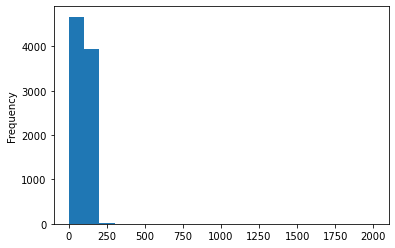

In [10]:
# drop nan for runtime_in_minutes
print(df[np.isnan(df['runtime_in_minutes'])].shape)
df = df.dropna(subset = ['runtime_in_minutes'])
df['runtime_in_minutes'].plot.hist(bins=20)

<AxesSubplot:ylabel='Frequency'>

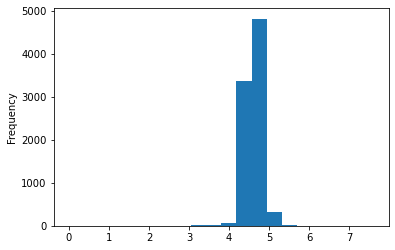

In [11]:
# log for runtime_in_minutes
df['runtime_in_minutes'] = df.apply(lambda x:np.log(x['runtime_in_minutes']), axis=1)
df['runtime_in_minutes'].plot.hist(bins=20)

In [12]:
# tomatometer_status
print(df['tomatometer_status'].unique())

['Fresh' 'Rotten' 'Certified Fresh']


(0, 28)


<AxesSubplot:ylabel='Frequency'>

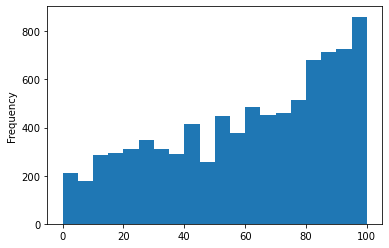

In [13]:
# tomatometer_rating
print(df[np.isnan(df['tomatometer_rating'])].shape)
df['tomatometer_rating'].plot.hist(bins=20)

(0, 28)


<AxesSubplot:ylabel='Frequency'>

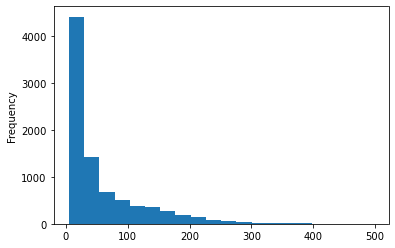

In [14]:
# tomatometer_count
print(df[np.isnan(df['tomatometer_count'])].shape)
df['tomatometer_count'].plot.hist(bins=20)

In [15]:
# audience_rating & audience_count
print(df[np.isnan(df['audience_rating'])].shape)
print(df[np.isnan(df['audience_count'])].shape)

# drop na
df = df.dropna(subset = ['audience_rating', 'audience_count'])

# audience_rating & audience_count
print(df[np.isnan(df['audience_rating'])].shape)
print(df[np.isnan(df['audience_count'])].shape)

(124, 28)
(124, 28)
(0, 28)
(0, 28)


In [16]:
# audience_status
df['audience_status'].unique()

array(['Upright', 'Spilled'], dtype=object)

In [17]:
# audience_status 0 for Spilled and Upright for 1
dic = {'Spilled':0,
       'Upright':1}
df['audience_status'] = df['audience_status'].map(dic)

In [18]:
# tomatometer_status
print(df['tomatometer_status'].unique())
dic = {'Rotten':0,
       'Fresh':1,
       'Certified Fresh':2}
df['tomatometer_status'] = df['tomatometer_status'].map(dic)

['Fresh' 'Rotten' 'Certified Fresh']


(0, 28)
(0, 28)
(0, 28)


<AxesSubplot:ylabel='Frequency'>

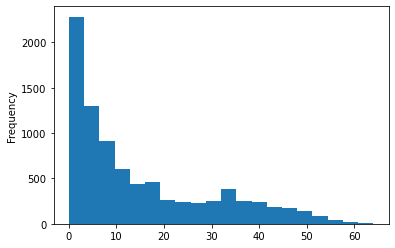

In [19]:
# audience_top_critics_count, audience_fresh_critics_count, audience_rotten_critics_count
print(df[np.isnan(df['audience_top_critics_count'])].shape)
print(df[np.isnan(df['audience_fresh_critics_count'])].shape)
print(df[np.isnan(df['audience_rotten_critics_count'])].shape)

df['audience_top_critics_count'].plot.hist(bins=20)

<AxesSubplot:ylabel='Frequency'>

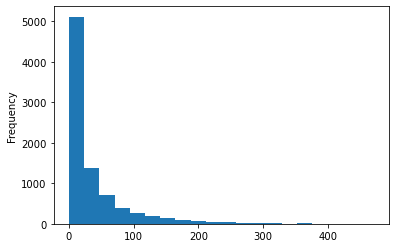

In [20]:
df['audience_fresh_critics_count'].plot.hist(bins=20)

<AxesSubplot:ylabel='Frequency'>

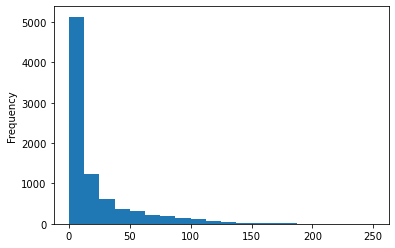

In [21]:
df['audience_rotten_critics_count'].plot.hist(bins=20)

In [22]:
# tomatometer_status is based on tomatometer_rating, so tomatometer_rating should not be included
df.to_csv('rotten_tomatoes_movies_proc.csv', index=False)
df_x = df[['audience_status','rating_G','rating_NC17','rating_NR',
           'rating_PG','rating_PG-13','rating_R','runtime_in_minutes','tomatometer_count',
           'audience_rating','audience_count','audience_top_critics_count','audience_fresh_critics_count',
           'audience_rotten_critics_count']]
df_y = df[['tomatometer_status']]

df_x.to_csv('rotten_tomatoes_movies_X.csv', index=False)
df_y.to_csv('rotten_tomatoes_movies_y.csv', index=False)

<AxesSubplot:>

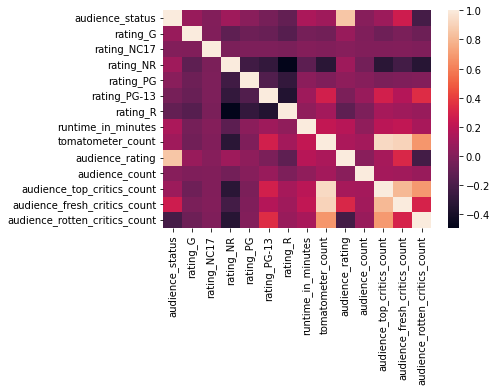

In [23]:
import seaborn as sns

# calculate the correlation matrix
corr = df_x.corr()

# plot the heatmap
sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns)

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(df_x)
df_x_rescaled = scaler.transform(df_x)

In [25]:
df_x.loc[:,'runtime_in_minutes'] = df_x_rescaled[:,7]
df_x.loc[:,'tomatometer_count'] = df_x_rescaled[:,8]
df_x.loc[:,'audience_rating'] = df_x_rescaled[:,9]
df_x.loc[:,'audience_count'] = df_x_rescaled[:,10]
df_x.loc[:,'audience_top_critics_count'] = df_x_rescaled[:,11]
df_x.loc[:,'audience_fresh_critics_count'] = df_x_rescaled[:,12]
df_x.loc[:,'audience_rotten_critics_count'] = df_x_rescaled[:,13]

/var/folders/th/xt_mxz4j4x1dj6nnb7z919lw0000gn/T/ipykernel_8137/1790920478.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x.loc[:,'runtime_in_minutes'] = df_x_rescaled[:,7]
/var/folders/th/xt_mxz4j4x1dj6nnb7z919lw0000gn/T/ipykernel_8137/1790920478.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x.loc[:,'tomatometer_count'] = df_x_rescaled[:,8]
/var/folders/th/xt_mxz4j4x1dj6nnb7z919lw0000gn/T/ipykernel_8137/1790920478.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [26]:
import sklearn

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [27]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(df_x, df_y, test_size = 0.20, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6803, 14)
(1701, 14)
(6803, 1)
(1701, 1)


In [28]:
model_1 = KNeighborsClassifier(n_neighbors=3)
model_1.fit(X_train,
            y_train.values.ravel()) # change (n,1) array to (n,)

KNeighborsClassifier(n_neighbors=3)

In [29]:
preds_1 = model_1.predict(X_test)
params_1 = model_1.get_params()
print(params_1)

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}


In [30]:
#Create a confusion matrix
#y_test as first argument and the preds as second argument 
confusion_matrix(y_test, preds_1)

#transform confusion matrix into array
#the matrix is stored in a vaiable called confmtrx
confmtrx = np.array(confusion_matrix(y_test, preds_1))
#Create DataFrame from confmtrx array 
#rows for test: Male, Female, Infant designation as index 
#columns for preds: male, predicted_female, predicted_infant as column

pd.DataFrame(confmtrx, index=['Rotten','Fresh','Certified Fresh'],
columns=['Predicted Rotten','Predicted Fresh','Predicted Certified Fresh'])

,Predicted Rotten,Predicted Fresh,Predicted Certified Fresh
Rotten,620,114,0
Fresh,98,539,26
Certified Fresh,5,27,272


In [31]:
#Accuracy statistics

print('Accuracy Score:', metrics.accuracy_score(y_test, preds_1))  

#Create classification report
class_report = classification_report(y_test, preds_1)
print(class_report)

Accuracy Score: 0.8412698412698413
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       734
           1       0.79      0.81      0.80       663
           2       0.91      0.89      0.90       304

    accuracy                           0.84      1701
   macro avg       0.85      0.85      0.85      1701
weighted avg       0.84      0.84      0.84      1701



In [32]:
model_2 = LogisticRegression(random_state=1,
                             multi_class='multinomial',
                             solver='newton-cg')
model_2.fit(X_train,
            y_train.values.ravel()) # change (n,1) array to (n,)

LogisticRegression(multi_class='multinomial', random_state=1,
                   solver='newton-cg')

In [33]:
'''
It is a good practice to evaluate classification models using *repeated stratified k-fold cross-validation*.
The stratification ensures that each cross-validation fold has approximately the same distribution of examples in each class as the whole training dataset.
'''
# define the model evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate the model and collect the scores
n_scores = cross_val_score(model_2, df_x, df_y, scoring='accuracy', cv=cv, n_jobs=-1)

# report the model performance
print(n_scores) # there are total n_splits times n_repeats number of performance scores
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

[0.94124559 0.95182139 0.93537015 0.93772033 0.93176471 0.95647059
 0.96117647 0.94588235 0.94352941 0.94       0.93889542 0.94124559
 0.94124559 0.94594595 0.93882353 0.94941176 0.93529412 0.94941176
 0.93647059 0.95294118 0.94007051 0.95299647 0.95887192 0.93184489
 0.93058824 0.94117647 0.94941176 0.94470588 0.94235294 0.94352941]
Mean Accuracy: 0.944 (0.008)


In [34]:
preds_2  = model_2.predict(X_test)
params_2 = model_2.get_params()
print(params_2)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': 'l2', 'random_state': 1, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [35]:
#Create a confusion matrix
#y_test as first argument and the preds as second argument 
confusion_matrix(y_test, preds_2)

#transform confusion matrix into array
#the matrix is stored in a vaiable called confmtrx
confmtrx = np.array(confusion_matrix(y_test, preds_2))
#Create DataFrame from confmtrx array 
#rows for test: Male, Female, Infant designation as index 
#columns for preds: male, predicted_female, predicted_infant as column

pd.DataFrame(confmtrx, index=['Rotten','Fresh','Certified Fresh'],
columns=['Predicted Rotten','Predicted Fresh','Predicted Certified Fresh'])

,Predicted Rotten,Predicted Fresh,Predicted Certified Fresh
Rotten,713,21,0
Fresh,12,631,20
Certified Fresh,0,43,261


In [36]:
#Accuracy statistics

print('Accuracy Score:', metrics.accuracy_score(y_test, preds_2))  

#Create classification report
class_report = classification_report(y_test, preds_2)
print(class_report)

Accuracy Score: 0.9435626102292769
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       734
           1       0.91      0.95      0.93       663
           2       0.93      0.86      0.89       304

    accuracy                           0.94      1701
   macro avg       0.94      0.93      0.93      1701
weighted avg       0.94      0.94      0.94      1701



In [37]:
model_2.coef_

array([[ 2.39984386e-01, -4.51584229e-02,  1.74339383e-01,
        -1.31866986e-01, -2.11311543e-02,  1.70576428e-01,
        -1.46755347e-01, -6.41454309e-02, -2.93420237e+00,
        -3.75012552e-01, -5.83488351e-02, -5.39143959e-01,
        -1.25069500e+01,  1.50268680e+01],
       [-1.28342020e-01,  1.06225735e-01, -1.15556118e-01,
         2.66580141e-01,  3.22308087e-02, -1.16172326e-01,
        -1.73296845e-01, -2.34517092e-02,  1.37986984e+00,
         2.64074885e-01,  3.28152307e-03, -8.06201102e-01,
         3.35420769e+00, -2.79001158e+00],
       [-1.11642366e-01, -6.10673123e-02, -5.87832641e-02,
        -1.34713155e-01, -1.10996544e-02, -5.44041016e-02,
         3.20052191e-01,  8.75971401e-02,  1.55433253e+00,
         1.10937667e-01,  5.50673120e-02,  1.34534506e+00,
         9.15274229e+00, -1.22368565e+01]])

<AxesSubplot:title={'center':'Feature Importance'}>

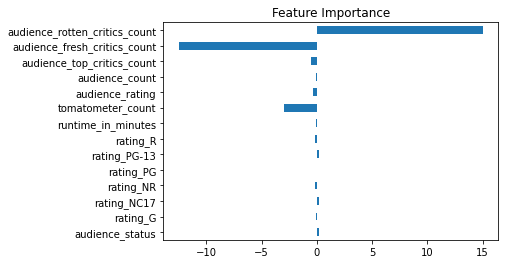

In [38]:
importance = model_2.coef_[0]
feat_importances = pd.Series(importance, index=X_test.columns)
feat_importances.plot(kind='barh',title = 'Feature Importance')

<AxesSubplot:title={'center':'Feature Importance'}>

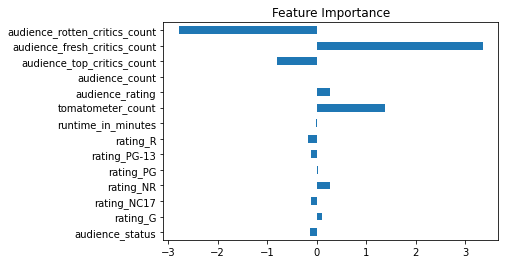

In [39]:
importance = model_2.coef_[1]
feat_importances = pd.Series(importance, index=X_test.columns)
feat_importances.plot(kind='barh',title = 'Feature Importance')

<AxesSubplot:title={'center':'Feature Importance'}>

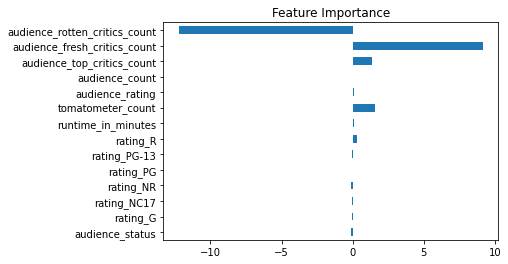

In [40]:
importance = model_2.coef_[2]
feat_importances = pd.Series(importance, index=X_test.columns)
feat_importances.plot(kind='barh',title = 'Feature Importance')